In [ ]:
!mkdir mnist-data
!curl http://cis.jhu.edu/~sachin/digit/data0 --output mnist-data/data0
!curl http://cis.jhu.edu/~sachin/digit/data1 --output mnist-data/data1
!curl http://cis.jhu.edu/~sachin/digit/data2 --output mnist-data/data2
!curl http://cis.jhu.edu/~sachin/digit/data3 --output mnist-data/data3
!curl http://cis.jhu.edu/~sachin/digit/data4 --output mnist-data/data4
!curl http://cis.jhu.edu/~sachin/digit/data5 --output mnist-data/data5
!curl http://cis.jhu.edu/~sachin/digit/data6 --output mnist-data/data6
!curl http://cis.jhu.edu/~sachin/digit/data7 --output mnist-data/data7
!curl http://cis.jhu.edu/~sachin/digit/data8 --output mnist-data/data8
!curl http://cis.jhu.edu/~sachin/digit/data9 --output mnist-data/data9

In [1]:
import numpy as np
import pylab as plt

import torch
import torch.nn
import torch.optim
import torch.utils.data
import torch.nn.functional as F

from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
class MNISTdataset(torch.utils.data.Dataset):

    def __init__(self):

        d0 = np.fromfile('mnist-data/data0', dtype=np.uint8).reshape((1000, 28, 28))
        d1 = np.fromfile('mnist-data/data1', dtype=np.uint8).reshape((1000, 28, 28))
        d2 = np.fromfile('mnist-data/data2', dtype=np.uint8).reshape((1000, 28, 28))
        d3 = np.fromfile('mnist-data/data3', dtype=np.uint8).reshape((1000, 28, 28))
        d4 = np.fromfile('mnist-data/data4', dtype=np.uint8).reshape((1000, 28, 28))
        d5 = np.fromfile('mnist-data/data5', dtype=np.uint8).reshape((1000, 28, 28))
        d6 = np.fromfile('mnist-data/data6', dtype=np.uint8).reshape((1000, 28, 28))
        d7 = np.fromfile('mnist-data/data7', dtype=np.uint8).reshape((1000, 28, 28))
        d8 = np.fromfile('mnist-data/data8', dtype=np.uint8).reshape((1000, 28, 28))
        d9 = np.fromfile('mnist-data/data9', dtype=np.uint8).reshape((1000, 28, 28))
        dataX = np.concatenate((d0, d1, d2, d3, d4, d5, d6, d7, d8, d9))
        dataY = np.concatenate(([0]*1000, [1]*1000, [2]*1000, [3]*1000, [4]*1000, [5]*1000, [6]*1000, [7]*1000, [8]*1000, [9]*1000))
        
        indices = np.random.permutation(10000)
        dataX = dataX[indices]
        dataY = dataY[indices]
        self.dataX = dataX.reshape(10000, 784).astype(np.float32) / 255
        self.dataY = dataY
#         self.dataY = OneHotEncoder(categories='auto', sparse=False).fit_transform(dataY.reshape(-1, 1))

    def __len__(self):
        return self.dataX.shape[0]

    def __getitem__(self, i):
        img = torch.Tensor(self.dataX[i])
        num = self.dataY[i]
        return (img, num)

In [3]:
class Net(torch.nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.d1 = torch.nn.Linear(784, 512)
        self.d2 = torch.nn.Linear(512, 512)
        self.d3 = torch.nn.Linear(512, 10)
        
    def forward(self, x):
        x = F.relu(self.d1(x))
        x = F.relu(self.d2(x))
        x = F.softmax(self.d3(x))
        return x

In [4]:
model = Net()

dataset = MNISTdataset()
traingenerator = torch.utils.data.DataLoader(dataset=dataset, batch_size=1024, shuffle=True)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.3, momentum=0.0)

In [5]:
%%time
losses = np.zeros(20)
for i in tqdm(range(20)):
    for batch in traingenerator:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = batch
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs.float())
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        for batch in traingenerator:
            inputs, labels = batch
            outputs = model(inputs.float())
            loss = criterion(outputs, labels.long())
            losses[i] += loss.item()

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
  5%|████▏                                                                              | 1/20 [00:01<00:36,  1.92s/it]


KeyboardInterrupt: 

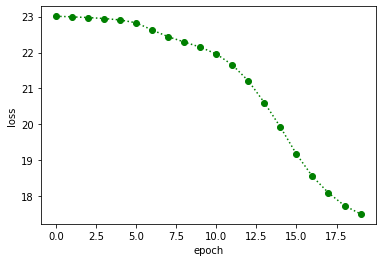

In [7]:
plt.plot(losses, 'go:')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [8]:
dataset = MNISTdataset()

In [9]:
yt = dataset.dataY
yp = np.zeros(yt.shape[0])
for i in tqdm(range(yp.shape[0])):
    x = torch.tensor(dataset.dataX[i][np.newaxis, :])
    y = model(x)
    yp[i] = y.detach().numpy().argmax(axis=1)
# yp = ypp.argmax(axis=0)
print(classification_report(yt, yp))

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':
100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2137.66it/s]
c:\users\u0001\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1000
           1       0.86      0.97      0.91      1000
           2       0.84      0.79      0.82      1000
           3       0.68      0.84      0.75      1000
           4       0.91      0.72      0.81      1000
           5       0.00      0.00      0.00      1000
           6       0.87      0.94      0.90      1000
           7       0.84      0.89      0.86      1000
           8       0.63      0.83      0.72      1000
           9       0.66      0.86      0.75      1000

    accuracy                           0.78     10000
   macro avg       0.71      0.78      0.74     10000
weighted avg       0.71      0.78      0.74     10000

